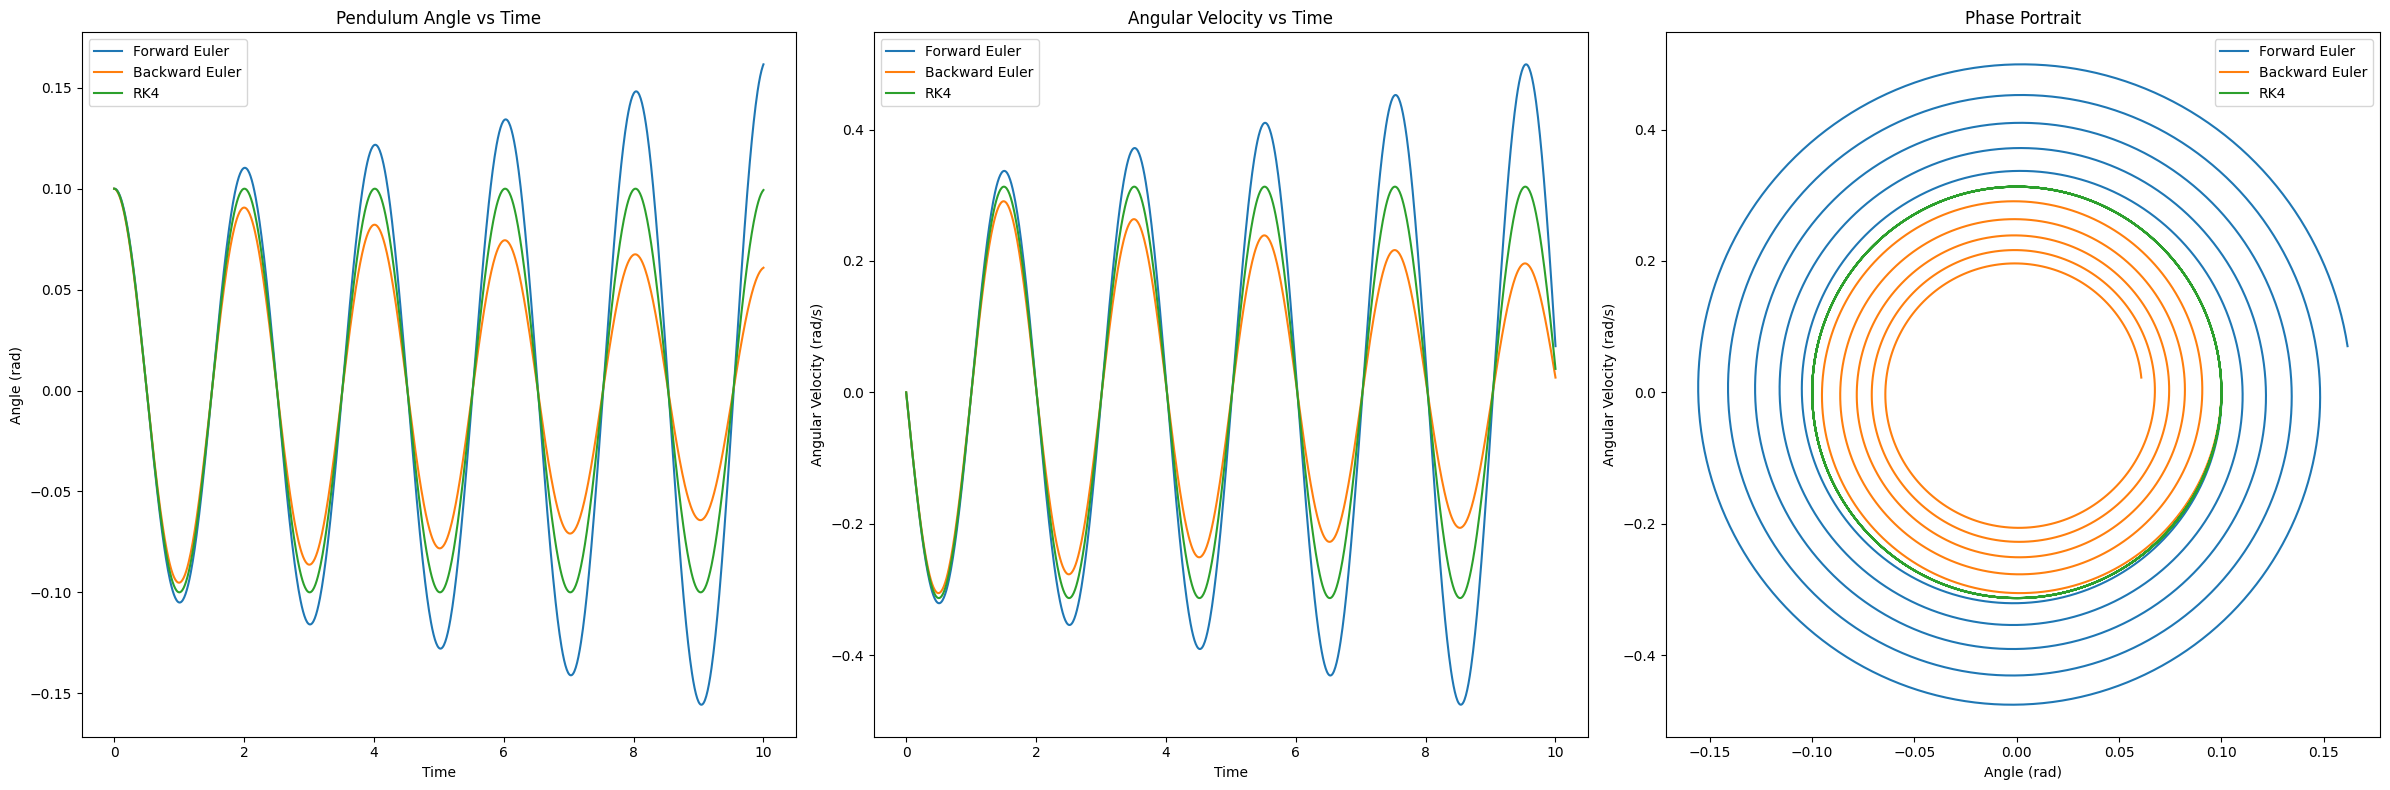

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def pendulum_dynamics(x):
    """
    Pendulum dynamics: d²θ/dt² = -(g/l) * sin(θ)
    State vector x = [θ, dθ/dt]
    """
    l = 1.0
    g = 9.81

    theta = x[0]
    theta_dot = x[1]

    theta_ddot = -(g/l) * np.sin(theta)

    return np.array([theta_dot, theta_ddot])

def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])

    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess

        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next

            if error < tol:
                break

    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)

        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return x_hist, t

# Test all integrators
x0 = np.array([0.1, 0.0])  # Initial state: [angle, angular_velocity]
Tf = 10.0
h = 0.01

# Forward Euler
x_fe, t_fe = forward_euler(pendulum_dynamics, x0, Tf, h)

# Backward Euler
x_be, t_be = backward_euler(pendulum_dynamics, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(pendulum_dynamics, x0, Tf, h)

# Plot results
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum Angle vs Time')

plt.subplot(1, 3, 2)
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Angular Velocity vs Time')

plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()

,max|x-x*|,max|v-v*|,L2(x),L2(v)
Forward Euler,1.283997e+00,1.250377e+00,3.738917e-01,3.639117e-01
Backward Euler,1.332001e+00,1.297136e+00,3.871199e-01,3.767976e-01
RK4,1.997464e-08,1.945888e-08,5.808466e-09,5.659770e-09


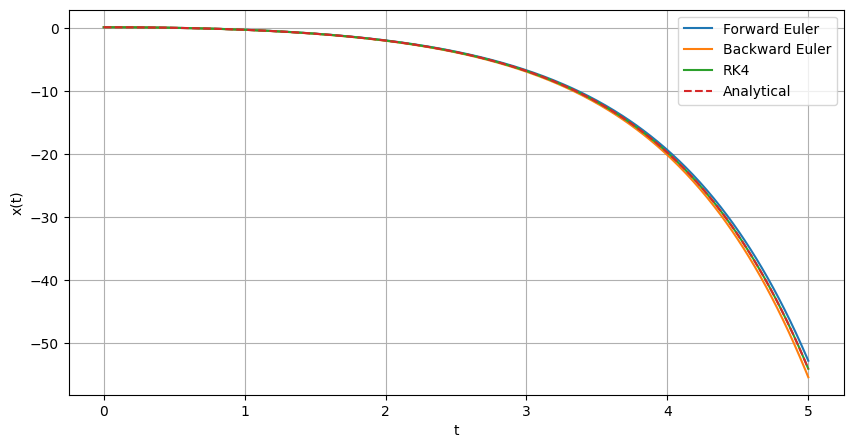

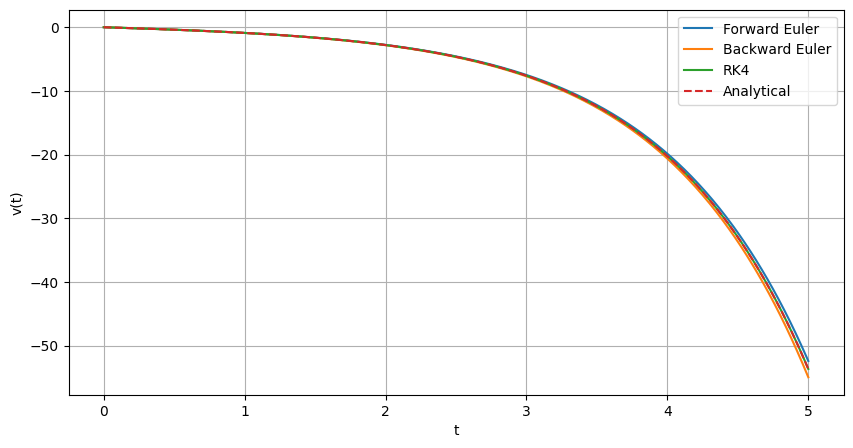

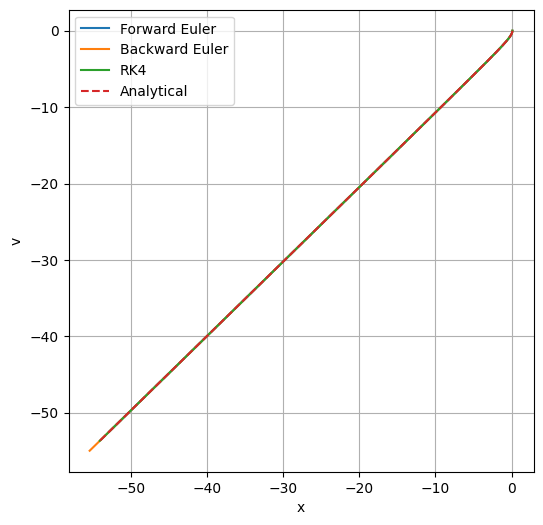

In [16]:
import pandas as pd
a, b, c, d = -6.43, 1.51, 4.63, 5.0

def ode_linear_rhs(state):
    x, v = state
    return np.array([v, (d - b*v - c*x)/a])

def analytical_solution_lin(t, x0, v0, a, b, c, d):
    t = np.asarray(t)
    xp = d / c
    disc = b*b - 4*a*c

    if disc > 1e-12:
        r1 = (-b - np.sqrt(disc)) / (2*a)
        r2 = (-b + np.sqrt(disc)) / (2*a)
        y0 = x0 - xp
        C1 = (y0*r2 - v0) / (r2 - r1)
        C2 = (v0 - y0*r1) / (r2 - r1)
        e1 = np.exp(r1*t); e2 = np.exp(r2*t)
        x = xp + C1*e1 + C2*e2
        v = C1*r1*e1 + C2*r2*e2
        return x, v

    elif abs(disc) <= 1e-12:
        r = -b / (2*a)
        y0 = x0 - xp
        C1 = y0
        C2 = v0 - r*C1
        e = np.exp(r*t)
        x = xp + (C1 + C2*t)*e
        v = (C2 + r*(C1 + C2*t))*e
        return x, v

    else:
        alpha = -b/(2*a)
        beta = np.sqrt(-disc)/(2*abs(a))
        y0 = x0 - xp
        A = y0
        B = (v0 - alpha*A)/beta
        e = np.exp(alpha*t); cb = np.cos(beta*t); sb = np.sin(beta*t)
        x = xp + e*(A*cb + B*sb)
        v = e*((alpha*A + beta*B)*cb + (alpha*B - beta*A)*sb)
        return x, v

x0 = np.array([0.1, 0.0])
Tf, h = 5.0, 0.01

x_fe, t = forward_euler(ode_linear_rhs, x0, Tf, h)
x_be, _  = backward_euler(ode_linear_rhs, x0, Tf, h)
x_rk4, _ = runge_kutta4(ode_linear_rhs, x0, Tf, h)

x_a, v_a = analytical_solution_lin(t, x0[0], x0[1], a, b, c, d)

def err_stats(x_hist, x_a, v_a):
    ex = np.abs(x_hist[0,:] - x_a)
    ev = np.abs(x_hist[1,:] - v_a)
    return {
        "max|x-x*|": np.max(ex),
        "max|v-v*|": np.max(ev),
        "L2(x)": np.sqrt(np.mean(ex**2)),
        "L2(v)": np.sqrt(np.mean(ev**2)),
    }

errs = {
    "Forward Euler": err_stats(x_fe, x_a, v_a),
    "Backward Euler": err_stats(x_be, x_a, v_a),
    "RK4":           err_stats(x_rk4, x_a, v_a),
}

display(pd.DataFrame(errs).T)


plt.figure(figsize=(10,5))
plt.plot(t, x_fe[0,:], label="Forward Euler")
plt.plot(t, x_be[0,:], label="Backward Euler")
plt.plot(t, x_rk4[0,:], label="RK4")
plt.plot(t, x_a, "--", label="Analytical")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, x_fe[1,:], label="Forward Euler")
plt.plot(t, x_be[1,:], label="Backward Euler")
plt.plot(t, x_rk4[1,:], label="RK4")
plt.plot(t, v_a, "--", label="Analytical")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x_fe[0,:], x_fe[1,:], label="Forward Euler")
plt.plot(x_be[0,:], x_be[1,:], label="Backward Euler")
plt.plot(x_rk4[0,:], x_rk4[1,:], label="RK4")
plt.plot(x_a, v_a, "--", label="Analytical")
plt.xlabel("x"); plt.ylabel("v")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()